In [1]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.shape

(8594, 13)

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [6]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


## Quick Clean

In [7]:
df = df.dropna()

In [8]:
df.shape

(8147, 13)

## Functions

In [9]:
def plotAndCompare(dataSet,x,y,xVals,independent):

    # collect plot and compare info
    xValLabels = []
    xValValues = []
    xValYCols = []
    xValYColsAndName = []
    xValYColsMeans = []
    for xVal in xVals:
        # grab the data to focus on (y) filtered by the 
        # x values
        xValYCol = dataSet[dataSet[x['column']] == xVal['value']][y['column']]
        # if not enough values to compare, skip
        # most compare tests need three or more elements
        # per list to compare (i.e. X and Y must both have 
        # more than 3 elements each)
        if xValYCol.size < 3:
            continue
        xValLabels.append(xVal['label'])
        xValValues.append(xVal['value'])
        xValYCols.append(xValYCol)
        xValYColsAndName.append([xVal['value'],xValYCol])
        xValYColsMeans.append(xValYCol.mean())
        
    grpSize = len(xValValues)
    trueDataSet = dataSet.loc[df[x['column']].isin(xValValues)]
    samples = len(trueDataSet)
    
    # check if enough data to work
    if samples < 3:
        print ('Not Enough Samples to continue: {}'.format(samples))
        return
    else:
        print ('Samples: {}'.format(samples))
    
    if grpSize < 2:
        print ('Group size too small to continue: {}'.format(grpSize))
        return
    
    # test for normal distribution; provide info on test
    stat, pVal = stats.shapiro(trueDataSet[y['column']])
    normDist = True
    distrb = 'Normal'
    if pVal < .05:
        normDist = False
        distrb = 'Non-Normal'
    print ('Shapiro-Wilk: {}, p-value: {}'.format(distrb, pVal))
        
    # provide descriptive plots
    size = (4,2)
    plt.figure()
    plt.subplots(figsize = size)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
    plt.subplot(1,2,1)
    sns.distplot(trueDataSet[y['column']]).set_title(x['label'])
    plt.subplot(1,2,2)
    g = sns.boxplot(x=x['column'], y=y['column'], 
                    data=trueDataSet).set_title(x['label']+' vs '+ y['label'])
    labels=[xValLabels]
    g.axes.set_xticklabels(*labels)
    plt.show()

    # print means
    for m,l in zip(xValYColsMeans, xValLabels):
        print ('Mean for {}: {}'.format(l,m))
    
    # determine compare test to use
    cmpr = None    
    
    if (grpSize == 2) and independent and normDist:
        cmpr = stats.ttest_ind
    
    if (grpSize == 2) and independent and not normDist:
        cmpr = stats.mannwhitneyu
    
    if (grpSize == 2) and not independent and normDist:
        xLen = len(xValYCols[0])
        yLen = len(xValYCols[1])
        if xLen == yLen:
            cmpr = stats.ttest_rel
        else:
            print ('Should use related T-test but x({}) and y({}) lengths do not match.'.format(xLen,yLen))
            print ('Using Mann-Whitney instead.')
            cmpr = stats.mannwhitneyu
    
    if (grpSize == 2) and not independent and not normDist:
        xLen = len(xValYCols[0])
        yLen = len(xValYCols[1])
        if xLen == yLen:
            cmpr = stats.wilcoxon
        else:
            print ('Should use Wilcoxon but x({}) and y({}) lengths do not match.'.format(xLen,yLen))
            print ('Using Mann-Whitney instead.')
            cmpr = stats.mannwhitneyu
            
    if (grpSize > 2) and independent and normDist:
        cmpr = stats.f_oneway
    
    if (grpSize > 2) and independent and not normDist:
        cmpr = stats.kruskal
    
    # perform compare 
    compareResult = cmpr(*xValYCols)
    print('\n' + str(compareResult))
    
    
    # see where the differences were
    if grpSize >2:
        xValYColsCombos = itertools.combinations(xValYColsAndName, 2)
        print ('\n Countries with significant differences:')
        for combo in xValYColsCombos:
            statistic, pvalue = stats.mannwhitneyu(combo[0][1],combo[1][1])
            if (pvalue < .05):
                print('   {} vs {}: pvalue={}'.format(combo[0][0],combo[1][0],pvalue))


## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.



Country: CH
Samples: 1475
Shapiro-Wilk: Non-Normal, p-value: 4.407215476405047e-21


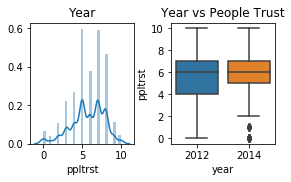

Mean for 2012: 5.685792349726776
Mean for 2014: 5.764468371467026
Should use Wilcoxon but x(732) and y(743) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)


Country: CZ
Samples: 1207
Shapiro-Wilk: Non-Normal, p-value: 1.3412505833624092e-14


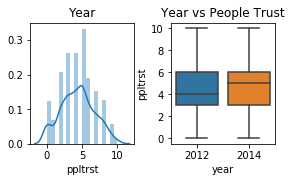

Mean for 2012: 4.402662229617304
Mean for 2014: 4.356435643564357
Should use Wilcoxon but x(601) and y(606) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)


Country: DE
Samples: 27
Shapiro-Wilk: Normal, p-value: 0.2554526627063751


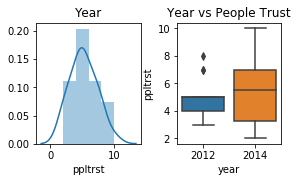

Mean for 2012: 5.076923076923077
Mean for 2014: 5.357142857142857
Should use related T-test but x(13) and y(14) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=84.0, pvalue=0.37414178719449009)


Country: ES
Samples: 2292
Shapiro-Wilk: Non-Normal, p-value: 1.3629532457042453e-24


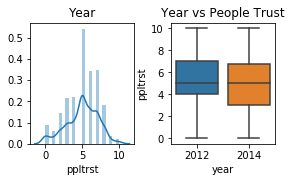

Mean for 2012: 5.127806563039724
Mean for 2014: 4.940035273368607
Should use Wilcoxon but x(1158) and y(1134) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=617480.0, pvalue=0.0061948210527193069)


Country: NO
Samples: 1420
Shapiro-Wilk: Non-Normal, p-value: 5.47450671147125e-26


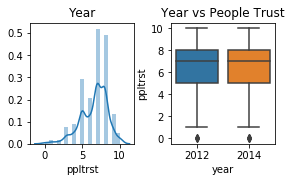

Mean for 2012: 6.648305084745763
Mean for 2014: 6.599719101123595
Should use Wilcoxon but x(708) and y(712) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=248611.0, pvalue=0.32466077815437411)


Country: SE
Samples: 1726
Shapiro-Wilk: Non-Normal, p-value: 2.5228400372501806e-26


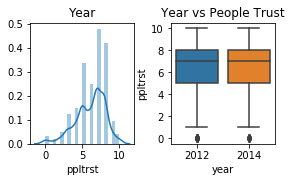

Mean for 2012: 6.043073341094296
Mean for 2014: 6.239907727797001
Should use Wilcoxon but x(859) and y(867) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


In [10]:
for c in df.cntry.unique():
    print ('\n\nCountry: ' + c)
    dataSet = df[df['cntry'] == c]
    x = {'column':'year', 'label':'Year'}
    y = {'column':'ppltrst', 'label':'People Trust'}
    xVals = [{'label':'2012','value':6},
             {'label':'2014','value':7}]

    plotAndCompare(dataSet,x,y,xVals,independent=False)

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.



Country: CH
Samples: 1475
Shapiro-Wilk: Non-Normal, p-value: 1.6046259609063557e-31


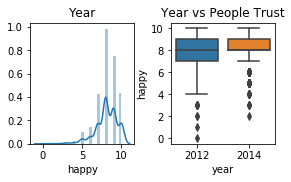

Mean for 2012: 8.083333333333334
Mean for 2014: 8.142664872139973
Should use Wilcoxon but x(732) and y(743) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)


Country: CZ
Samples: 1207
Shapiro-Wilk: Non-Normal, p-value: 1.2196262759798681e-20


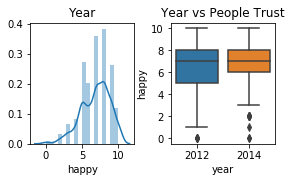

Mean for 2012: 6.790349417637271
Mean for 2014: 6.922442244224422
Should use Wilcoxon but x(601) and y(606) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)


Country: DE
Samples: 27
Shapiro-Wilk: Non-Normal, p-value: 0.018307127058506012


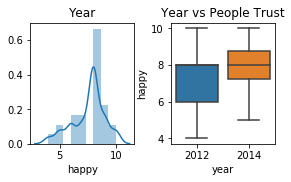

Mean for 2012: 7.3076923076923075
Mean for 2014: 7.857142857142857
Should use Wilcoxon but x(13) and y(14) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)


Country: ES
Samples: 2292
Shapiro-Wilk: Non-Normal, p-value: 7.530217959311276e-35


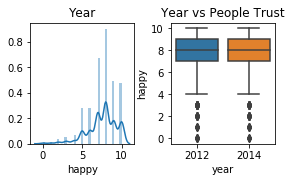

Mean for 2012: 7.557858376511226
Mean for 2014: 7.450617283950617
Should use Wilcoxon but x(1158) and y(1134) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)


Country: NO
Samples: 1420
Shapiro-Wilk: Non-Normal, p-value: 2.9714223341902556e-33


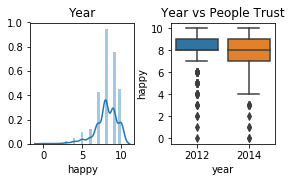

Mean for 2012: 8.252824858757062
Mean for 2014: 7.919943820224719
Should use Wilcoxon but x(708) and y(712) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)


Country: SE
Samples: 1726
Shapiro-Wilk: Non-Normal, p-value: 4.496728096273993e-31


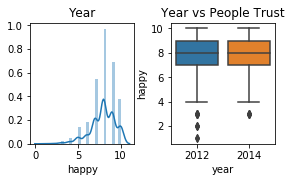

Mean for 2012: 7.90104772991851
Mean for 2014: 7.9388696655132645
Should use Wilcoxon but x(859) and y(867) lengths do not match.
Using Mann-Whitney instead.

MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


In [11]:
for c in df.cntry.unique():
    print ('\n\nCountry: ' + c)
    dataSet = df[df['cntry'] == c]
    x = {'column':'year', 'label':'Year'}
    y = {'column':'happy', 'label':'People Trust'}
    xVals = [{'label':'2012','value':6},
             {'label':'2014','value':7}]

    plotAndCompare(dataSet,x,y,xVals,independent=False)

## Who reported watching more TV in 2012, men or women?

Samples: 4071
Shapiro-Wilk: Non-Normal, p-value: 4.35002369366526e-37


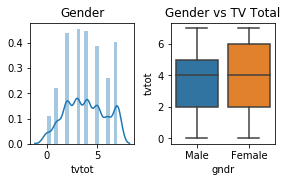

Mean for Male: 3.8592303945445687
Mean for Female: 3.9053518334985133

MannwhitneyuResult(statistic=2042391.5, pvalue=0.21654019333228419)


In [12]:
dataSet = df[df['year'] == 6]
x = {'column':'gndr', 'label':'Gender'}
y = {'column':'tvtot', 'label':'TV Total'}
xVals = [{'label':'Male','value':1},
         {'label':'Female','value':2}]

plotAndCompare(dataSet,x,y,xVals,independent=True)

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Samples: 4071
Shapiro-Wilk: Non-Normal, p-value: 1.4426241793085802e-34


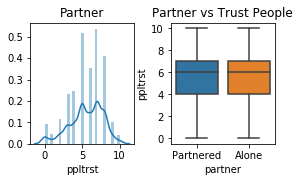

Mean for Partnered: 5.664044059795437
Mean for Alone: 5.436232831916286

MannwhitneyuResult(statistic=1819469.0, pvalue=0.00028006641288894844)


In [13]:
dataSet = df[df['year'] == 6]
x = {'column':'partner', 'label':'Partner'}
y = {'column':'ppltrst', 'label':'Trust People'}
xVals = [{'label':'Partnered','value':1},
         {'label':'Alone','value':2}]

plotAndCompare(dataSet,x,y,xVals,independent=True)

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Samples: 4076
Shapiro-Wilk: Non-Normal, p-value: 1.1210387714598537e-44


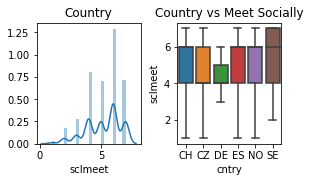

Mean for CH: 5.174966352624495
Mean for CZ: 4.4950495049504955
Mean for DE: 4.428571428571429
Mean for ES: 5.263668430335097
Mean for NO: 5.310393258426966
Mean for SE: 5.434832756632065

KruskalResult(statistic=185.27876431434859, pvalue=3.9883901965808886e-38)

 Countries with significant differences:
   CH vs CZ: pvalue=1.4733240066723786e-18
   CH vs DE: pvalue=0.004048842515025555
   CH vs ES: pvalue=0.016845383400336846
   CH vs NO: pvalue=0.011156506323492518
   CH vs SE: pvalue=3.274969767352643e-06
   CZ vs ES: pvalue=2.119303290451085e-27
   CZ vs NO: pvalue=2.4170120935752383e-24
   CZ vs SE: pvalue=1.6124279217599993e-33
   DE vs ES: pvalue=0.0018381039988461976
   DE vs NO: pvalue=0.0019699258492557603
   DE vs SE: pvalue=0.0008079332015217882
   ES vs SE: pvalue=0.004420346961619163
   NO vs SE: pvalue=0.01672227425096414


In [14]:
dataSet = df[df['year'] == 7]
x = {'column':'cntry', 'label':'Country'}
y = {'column':'sclmeet', 'label':'Meet Socially'}
xVals = [{'label':'CH','value':'CH'},
         {'label':'CZ','value':'CZ'},
         {'label':'DE','value':'DE'},
         {'label':'ES','value':'ES'},
         {'label':'NO','value':'NO'},
         {'label':'SE','value':'SE'}
        ]

plotAndCompare(dataSet,x,y,xVals,independent=True)

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


Age: 15.0
Samples: 12
Shapiro-Wilk: Non-Normal, p-value: 0.006262464914470911


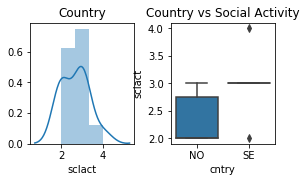

Mean for NO: 2.3333333333333335
Mean for SE: 3.0

MannwhitneyuResult(statistic=8.0, pvalue=0.04526062230267399)

Age: 16.0
Samples: 54
Shapiro-Wilk: Non-Normal, p-value: 2.8291449780226685e-05


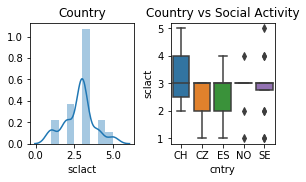

Mean for CH: 3.272727272727273
Mean for CZ: 2.4
Mean for ES: 2.4545454545454546
Mean for NO: 2.8181818181818183
Mean for SE: 2.875

KruskalResult(statistic=3.9672629260327783, pvalue=0.41045446060382307)

 Countries with significant differences:

Age: 17.0
Samples: 82
Shapiro-Wilk: Non-Normal, p-value: 1.6264640407825937e-06


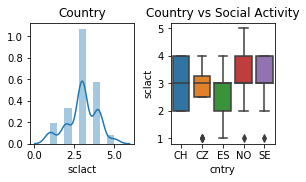

Mean for CH: 3.0
Mean for CZ: 2.75
Mean for ES: 2.8095238095238093
Mean for NO: 3.3125
Mean for SE: 3.1578947368421053

KruskalResult(statistic=2.9620155665563348, pvalue=0.56420199670420279)

 Countries with significant differences:

Age: 18.0
Samples: 77
Shapiro-Wilk: Non-Normal, p-value: 1.845584165494074e-07


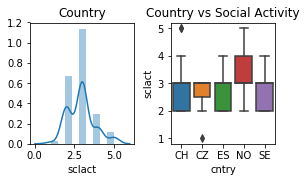

Mean for CH: 3.0
Mean for CZ: 2.5714285714285716
Mean for ES: 2.764705882352941
Mean for NO: 3.25
Mean for SE: 2.7333333333333334

KruskalResult(statistic=3.8605858781641236, pvalue=0.42520216455948412)

 Countries with significant differences:

Age: 19.0
Samples: 59
Shapiro-Wilk: Non-Normal, p-value: 5.303339776219218e-07


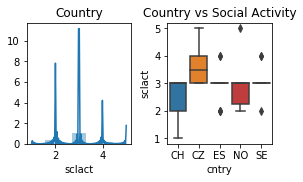

Mean for CH: 2.4615384615384617
Mean for CZ: 3.625
Mean for ES: 2.923076923076923
Mean for NO: 2.857142857142857
Mean for SE: 3.090909090909091

KruskalResult(statistic=13.157106853536794, pvalue=0.010533115937426651)

 Countries with significant differences:
   CH vs CZ: pvalue=0.001536153518969182
   CH vs SE: pvalue=0.012069926516292006
   CZ vs ES: pvalue=0.02355291930004537
   CZ vs NO: pvalue=0.010456357143249417

Age: 20.0
Samples: 62
Shapiro-Wilk: Non-Normal, p-value: 3.382986324140802e-05


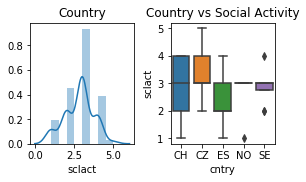

Mean for CH: 2.7857142857142856
Mean for CZ: 3.3076923076923075
Mean for ES: 2.473684210526316
Mean for NO: 2.75
Mean for SE: 2.875

KruskalResult(statistic=6.4060285722577888, pvalue=0.17080848325695394)

 Countries with significant differences:
   CZ vs ES: pvalue=0.007518165791164008

Age: 21.0
Samples: 66
Shapiro-Wilk: Non-Normal, p-value: 7.957470415931311e-08


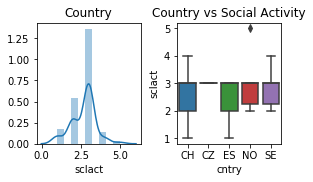

Mean for CH: 2.4444444444444446
Mean for CZ: 3.0
Mean for ES: 2.533333333333333
Mean for NO: 2.857142857142857
Mean for SE: 2.9

KruskalResult(statistic=4.7859107704940174, pvalue=0.30997796998609684)

 Countries with significant differences:
   CZ vs ES: pvalue=0.01817609333115428

Age: 22.0
Samples: 63
Shapiro-Wilk: Non-Normal, p-value: 2.736938768066466e-05


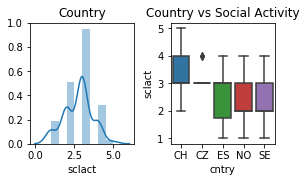

Mean for CH: 3.3
Mean for CZ: 3.1666666666666665
Mean for ES: 2.4375
Mean for NO: 2.533333333333333
Mean for SE: 2.5

KruskalResult(statistic=9.614194383973091, pvalue=0.047452960271438964)

 Countries with significant differences:
   CH vs ES: pvalue=0.02702776063418811
   CH vs NO: pvalue=0.028697380709201657
   CH vs SE: pvalue=0.04478867490751037
   CZ vs ES: pvalue=0.013298720521304205
   CZ vs NO: pvalue=0.010562142898388164
   CZ vs SE: pvalue=0.02272116140129126

Age: 23.0
Samples: 66
Shapiro-Wilk: Non-Normal, p-value: 3.144888614770025e-05


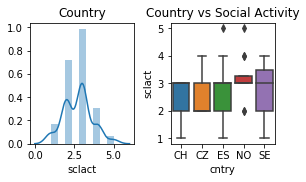

Mean for CH: 2.5
Mean for CZ: 2.5555555555555554
Mean for ES: 2.8125
Mean for NO: 3.1666666666666665
Mean for SE: 2.6

KruskalResult(statistic=4.1549701218635411, pvalue=0.38543899938421888)

 Countries with significant differences:
   CH vs NO: pvalue=0.02287760154072649
   CZ vs NO: pvalue=0.04532773701145692

Age: 24.0
Samples: 58
Shapiro-Wilk: Non-Normal, p-value: 3.850839675578754e-06


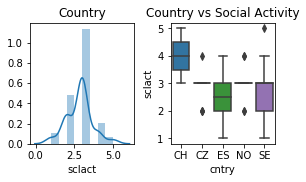

Mean for CH: 4.0
Mean for CZ: 2.8666666666666667
Mean for ES: 2.4285714285714284
Mean for NO: 3.0
Mean for SE: 2.8125

KruskalResult(statistic=8.4383967674661005, pvalue=0.07677666240323916)

 Countries with significant differences:
   CH vs CZ: pvalue=0.016816398787016035
   CH vs ES: pvalue=0.01701728148970693
   CH vs SE: pvalue=0.034025035821261616

Age: 25.0
Samples: 64
Shapiro-Wilk: Non-Normal, p-value: 1.9185424804391005e-08


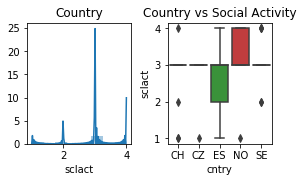

Mean for CH: 2.6923076923076925
Mean for CZ: 2.7142857142857144
Mean for ES: 2.55
Mean for NO: 3.142857142857143
Mean for SE: 3.0588235294117645

KruskalResult(statistic=5.8692048816567803, pvalue=0.20913138344072085)

 Countries with significant differences:
   ES vs SE: pvalue=0.032485663323517905

Age: 26.0
Samples: 44
Shapiro-Wilk: Non-Normal, p-value: 2.8378284696373157e-05


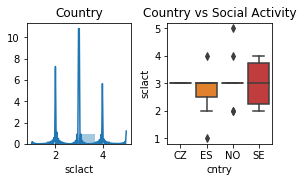

Mean for CZ: 3.0
Mean for ES: 2.727272727272727
Mean for NO: 3.111111111111111
Mean for SE: 3.0

KruskalResult(statistic=0.85815044666155826, pvalue=0.83551347999044212)

 Countries with significant differences:

Age: 27.0
Samples: 50
Shapiro-Wilk: Non-Normal, p-value: 3.775089862756431e-05


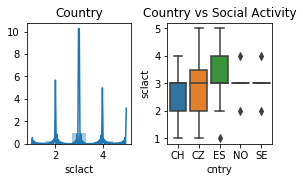

Mean for CH: 2.6153846153846154
Mean for CZ: 3.0
Mean for ES: 3.142857142857143
Mean for NO: 3.0
Mean for SE: 3.0

KruskalResult(statistic=2.2679536401255573, pvalue=0.6866095221885653)

 Countries with significant differences:

Age: 28.0
Samples: 46
Shapiro-Wilk: Non-Normal, p-value: 2.064253294520313e-06


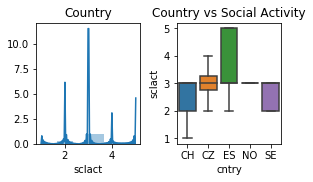

Mean for CH: 2.5555555555555554
Mean for CZ: 3.0
Mean for ES: 3.6923076923076925
Mean for NO: 3.0
Mean for SE: 2.6666666666666665

KruskalResult(statistic=10.822083070029267, pvalue=0.028638028077011813)

 Countries with significant differences:
   CH vs ES: pvalue=0.007786094245290572
   ES vs SE: pvalue=0.008492806517732255

Age: 29.0
Samples: 53
Shapiro-Wilk: Non-Normal, p-value: 0.00019162593525834382


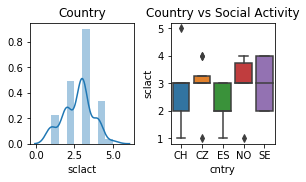

Mean for CH: 2.5454545454545454
Mean for CZ: 3.0
Mean for ES: 2.3333333333333335
Mean for NO: 3.0
Mean for SE: 3.076923076923077

KruskalResult(statistic=7.2624009483049869, pvalue=0.12265443391321265)

 Countries with significant differences:
   CZ vs ES: pvalue=0.024231807332869632
   ES vs NO: pvalue=0.047235033083899196
   ES vs SE: pvalue=0.01782197316029501

Age: 30.0
Samples: 40
Shapiro-Wilk: Non-Normal, p-value: 9.803007742448244e-06


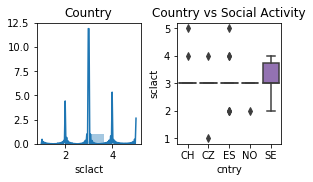

Mean for CH: 3.3333333333333335
Mean for CZ: 2.8
Mean for ES: 3.066666666666667
Mean for NO: 2.8
Mean for SE: 3.1666666666666665

KruskalResult(statistic=2.0385401745018887, pvalue=0.72867024794881585)

 Countries with significant differences:

Age: 31.0
Samples: 55
Shapiro-Wilk: Non-Normal, p-value: 2.1509499674721155e-06


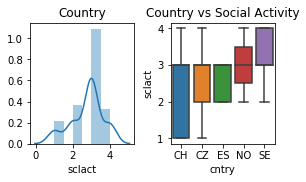

Mean for CH: 2.4166666666666665
Mean for CZ: 2.6666666666666665
Mean for ES: 2.5714285714285716
Mean for NO: 3.0
Mean for SE: 3.230769230769231

KruskalResult(statistic=6.9730395014284898, pvalue=0.13731984203801928)

 Countries with significant differences:
   CH vs SE: pvalue=0.025666739764477434
   ES vs SE: pvalue=0.004359283412705365

Age: 32.0
Samples: 56
Shapiro-Wilk: Non-Normal, p-value: 2.1367341105360538e-05


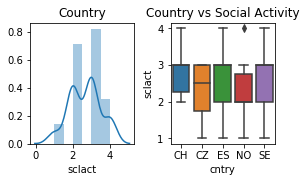

Mean for CH: 2.9
Mean for CZ: 2.25
Mean for ES: 2.857142857142857
Mean for NO: 2.3
Mean for SE: 2.5454545454545454

KruskalResult(statistic=4.9334763234902965, pvalue=0.29419160068534628)

 Countries with significant differences:
   CH vs NO: pvalue=0.04780448318442967
   ES vs NO: pvalue=0.042369173955814625

Age: 33.0
Samples: 67
Shapiro-Wilk: Non-Normal, p-value: 3.2069315238913987e-06


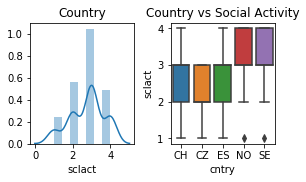

Mean for CH: 2.8
Mean for CZ: 2.2222222222222223
Mean for ES: 2.65
Mean for NO: 3.0
Mean for SE: 3.1

KruskalResult(statistic=6.2231882477189426, pvalue=0.18308892670983529)

 Countries with significant differences:
   CZ vs NO: pvalue=0.027827364816932328
   CZ vs SE: pvalue=0.024204405776231428

Age: 34.0
Samples: 68
Shapiro-Wilk: Non-Normal, p-value: 6.0861470956297126e-06


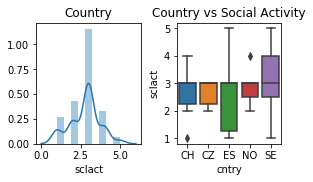

Mean for CH: 2.7857142857142856
Mean for CZ: 2.7
Mean for ES: 2.6363636363636362
Mean for NO: 2.8181818181818183
Mean for SE: 3.090909090909091

KruskalResult(statistic=1.4942901654797138, pvalue=0.82765240931627004)

 Countries with significant differences:

Age: 35.0
Samples: 71
Shapiro-Wilk: Non-Normal, p-value: 4.97713790537091e-06


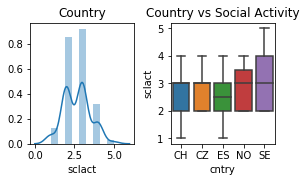

Mean for CH: 2.7058823529411766
Mean for CZ: 2.6875
Mean for ES: 2.409090909090909
Mean for NO: 2.857142857142857
Mean for SE: 3.111111111111111

KruskalResult(statistic=3.3635800251551831, pvalue=0.49892199112117463)

 Countries with significant differences:

Age: 36.0
Samples: 63
Shapiro-Wilk: Non-Normal, p-value: 8.223561053455342e-06


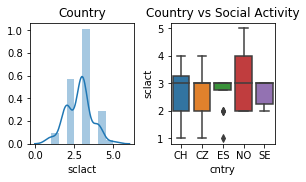

Mean for CH: 2.85
Mean for CZ: 2.6923076923076925
Mean for ES: 2.6875
Mean for NO: 3.125
Mean for SE: 2.6666666666666665

KruskalResult(statistic=1.1105118986334039, pvalue=0.8926008097564464)

 Countries with significant differences:

Age: 37.0
Samples: 64
Shapiro-Wilk: Non-Normal, p-value: 2.175873760279501e-06


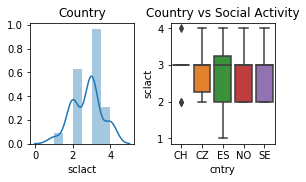

Mean for CH: 2.888888888888889
Mean for CZ: 2.8
Mean for ES: 2.625
Mean for NO: 2.769230769230769
Mean for SE: 2.75

KruskalResult(statistic=0.51464444182670555, pvalue=0.97205977165979585)

 Countries with significant differences:

Age: 38.0
Samples: 49
Shapiro-Wilk: Non-Normal, p-value: 2.318243969057221e-05


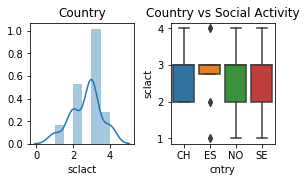

Mean for CH: 2.6666666666666665
Mean for ES: 2.75
Mean for NO: 2.6666666666666665
Mean for SE: 2.75

KruskalResult(statistic=0.36837658418828367, pvalue=0.94669481316583459)

 Countries with significant differences:

Age: 39.0
Samples: 84
Shapiro-Wilk: Non-Normal, p-value: 2.8860716039247336e-09


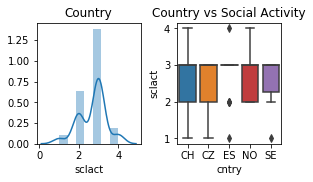

Mean for CH: 2.782608695652174
Mean for CZ: 2.6153846153846154
Mean for ES: 2.782608695652174
Mean for NO: 2.6666666666666665
Mean for SE: 2.6

KruskalResult(statistic=1.1181372722571974, pvalue=0.8913839524374586)

 Countries with significant differences:

Age: 40.0
Samples: 71
Shapiro-Wilk: Non-Normal, p-value: 3.46289006358802e-08


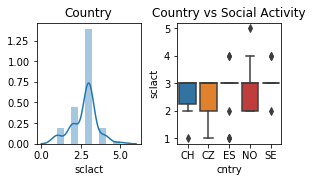

Mean for CH: 2.6
Mean for CZ: 2.473684210526316
Mean for ES: 2.75
Mean for NO: 3.0
Mean for SE: 3.111111111111111

KruskalResult(statistic=5.9254633566064703, pvalue=0.20478429504691581)

 Countries with significant differences:
   CZ vs SE: pvalue=0.016053207667884175

Age: 41.0
Samples: 68
Shapiro-Wilk: Non-Normal, p-value: 2.2565065592061728e-05


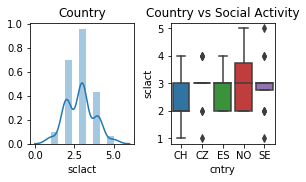

Mean for CH: 2.5
Mean for CZ: 2.933333333333333
Mean for ES: 2.823529411764706
Mean for NO: 3.0
Mean for SE: 2.9375

KruskalResult(statistic=2.2605613022268889, pvalue=0.68795839243757961)

 Countries with significant differences:

Age: 42.0
Samples: 83
Shapiro-Wilk: Non-Normal, p-value: 3.976824245910393e-06


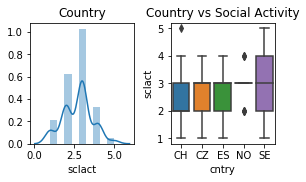

Mean for CH: 2.6666666666666665
Mean for CZ: 2.3846153846153846
Mean for ES: 2.55
Mean for NO: 2.9444444444444446
Mean for SE: 3.0

KruskalResult(statistic=4.7223755758162866, pvalue=0.31698736368355096)

 Countries with significant differences:

Age: 43.0
Samples: 75
Shapiro-Wilk: Non-Normal, p-value: 4.862619675805036e-07


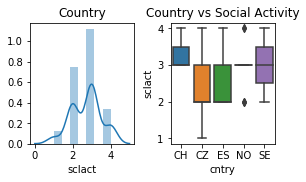

Mean for CH: 3.272727272727273
Mean for CZ: 2.3157894736842106
Mean for ES: 2.5833333333333335
Mean for NO: 2.9285714285714284
Mean for SE: 3.0

KruskalResult(statistic=12.978117397186113, pvalue=0.01138321265073796)

 Countries with significant differences:
   CH vs CZ: pvalue=0.0016360390540400898
   CH vs ES: pvalue=0.0030883772829597166
   CZ vs NO: pvalue=0.022450311667740804

Age: 44.0
Samples: 64
Shapiro-Wilk: Non-Normal, p-value: 2.585024105883349e-07


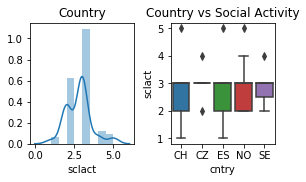

Mean for CH: 2.7
Mean for CZ: 3.0
Mean for ES: 2.611111111111111
Mean for NO: 2.8421052631578947
Mean for SE: 2.857142857142857

KruskalResult(statistic=3.0313040877517081, pvalue=0.55260047222152631)

 Countries with significant differences:
   CZ vs ES: pvalue=0.04344266491013836

Age: 45.0
Samples: 78
Shapiro-Wilk: Non-Normal, p-value: 5.128667339704407e-07


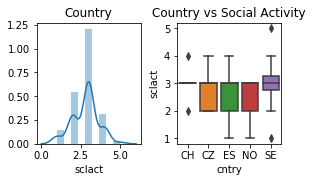

Mean for CH: 3.0
Mean for CZ: 2.8
Mean for ES: 2.8275862068965516
Mean for NO: 2.4166666666666665
Mean for SE: 3.0

KruskalResult(statistic=3.2265971172155603, pvalue=0.52064579751183526)

 Countries with significant differences:
   CH vs NO: pvalue=0.040532992370264906

Age: 46.0
Samples: 84
Shapiro-Wilk: Non-Normal, p-value: 2.721876057876216e-07


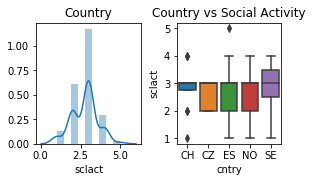

Mean for CH: 2.8333333333333335
Mean for CZ: 2.6
Mean for ES: 2.735294117647059
Mean for NO: 2.6923076923076925
Mean for SE: 2.933333333333333

KruskalResult(statistic=1.8948040387457834, pvalue=0.75509943769256771)

 Countries with significant differences:

Age: 47.0
Samples: 72
Shapiro-Wilk: Non-Normal, p-value: 2.8863839816040127e-06


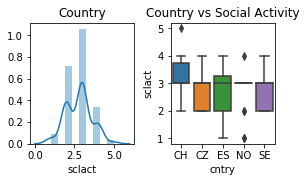

Mean for CH: 3.2
Mean for CZ: 2.75
Mean for ES: 2.75
Mean for NO: 2.7058823529411766
Mean for SE: 2.6470588235294117

KruskalResult(statistic=2.6852806242433953, pvalue=0.61179276057142284)

 Countries with significant differences:

Age: 48.0
Samples: 70
Shapiro-Wilk: Non-Normal, p-value: 6.068930360925151e-06


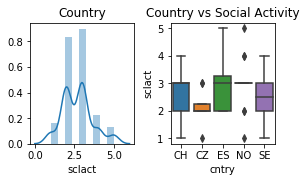

Mean for CH: 2.642857142857143
Mean for CZ: 2.125
Mean for ES: 2.95
Mean for NO: 3.0
Mean for SE: 2.4285714285714284

KruskalResult(statistic=6.5314821534674099, pvalue=0.16281752998816007)

 Countries with significant differences:
   CZ vs ES: pvalue=0.03445029958991815
   CZ vs NO: pvalue=0.011814851852142401

Age: 49.0
Samples: 77
Shapiro-Wilk: Non-Normal, p-value: 1.7487601553511922e-06


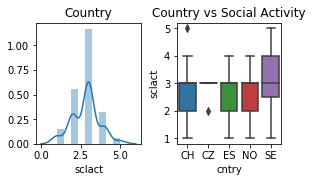

Mean for CH: 2.8421052631578947
Mean for CZ: 2.9
Mean for ES: 2.6
Mean for NO: 2.769230769230769
Mean for SE: 3.066666666666667

KruskalResult(statistic=2.5156746410716875, pvalue=0.64183122245629809)

 Countries with significant differences:

Age: 50.0
Samples: 73
Shapiro-Wilk: Non-Normal, p-value: 1.9214074200135656e-05


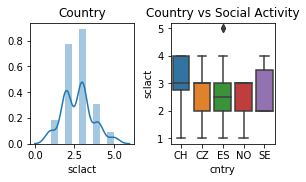

Mean for CH: 3.0
Mean for CZ: 2.6666666666666665
Mean for ES: 2.6923076923076925
Mean for NO: 2.4444444444444446
Mean for SE: 2.727272727272727

KruskalResult(statistic=2.3708976772020338, pvalue=0.6678927895412694)

 Countries with significant differences:

Age: 51.0
Samples: 69
Shapiro-Wilk: Non-Normal, p-value: 3.3556196285644546e-05


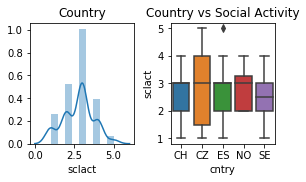

Mean for CH: 2.769230769230769
Mean for CZ: 2.9
Mean for ES: 2.772727272727273
Mean for NO: 2.9166666666666665
Mean for SE: 2.5

KruskalResult(statistic=1.48928814281889, pvalue=0.82853722949773845)

 Countries with significant differences:

Age: 52.0
Samples: 81
Shapiro-Wilk: Non-Normal, p-value: 5.7833735809253994e-06


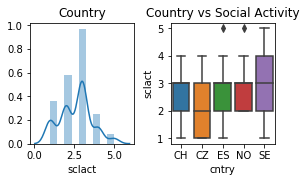

Mean for CH: 2.764705882352941
Mean for CZ: 2.1818181818181817
Mean for ES: 2.4
Mean for NO: 2.8
Mean for SE: 2.923076923076923

KruskalResult(statistic=4.3862394317476427, pvalue=0.35625044096019953)

 Countries with significant differences:

Age: 53.0
Samples: 78
Shapiro-Wilk: Non-Normal, p-value: 7.595474471600028e-07


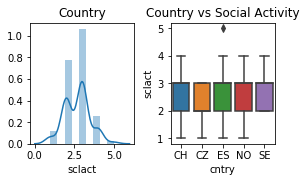

Mean for CH: 2.75
Mean for CZ: 2.3636363636363638
Mean for ES: 2.7142857142857144
Mean for NO: 2.823529411764706
Mean for SE: 2.6923076923076925

KruskalResult(statistic=2.5942570157046503, pvalue=0.62784080507169071)

 Countries with significant differences:

Age: 54.0
Samples: 76
Shapiro-Wilk: Non-Normal, p-value: 1.1062360272262595e-07


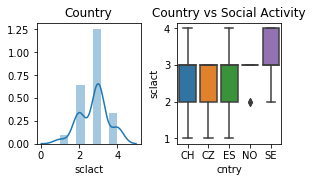

Mean for CH: 2.7142857142857144
Mean for CZ: 2.5384615384615383
Mean for ES: 2.782608695652174
Mean for NO: 2.7777777777777777
Mean for SE: 3.0588235294117645

KruskalResult(statistic=3.4210252666065677, pvalue=0.48998776737970373)

 Countries with significant differences:
   CZ vs SE: pvalue=0.040031850738790176

Age: 55.0
Samples: 74
Shapiro-Wilk: Non-Normal, p-value: 7.023335797384789e-07


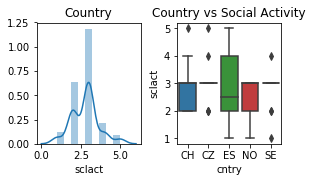

Mean for CH: 2.9
Mean for CZ: 3.0
Mean for ES: 2.75
Mean for NO: 2.5555555555555554
Mean for SE: 2.7857142857142856

KruskalResult(statistic=2.4088466675447768, pvalue=0.66102911995135827)

 Countries with significant differences:
   CZ vs NO: pvalue=0.04671357524721311

Age: 56.0
Samples: 84
Shapiro-Wilk: Non-Normal, p-value: 1.426828703188221e-06


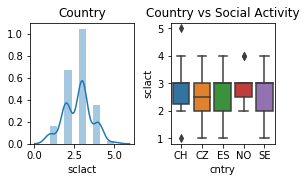

Mean for CH: 2.9285714285714284
Mean for CZ: 2.5
Mean for ES: 2.772727272727273
Mean for NO: 2.8666666666666667
Mean for SE: 2.619047619047619

KruskalResult(statistic=2.3035089135172533, pvalue=0.68013027315731545)

 Countries with significant differences:

Age: 57.0
Samples: 48
Shapiro-Wilk: Non-Normal, p-value: 1.347664806417015e-06


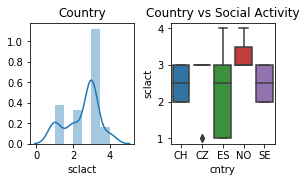

Mean for CH: 2.5
Mean for CZ: 2.6363636363636362
Mean for ES: 2.2222222222222223
Mean for NO: 3.2857142857142856
Mean for SE: 2.5

KruskalResult(statistic=7.5271371523882351, pvalue=0.11051859540714234)

 Countries with significant differences:
   CH vs NO: pvalue=0.016313981650241848
   CZ vs NO: pvalue=0.02672921329064598
   ES vs NO: pvalue=0.015840483915318067
   NO vs SE: pvalue=0.016313981650241848

Age: 58.0
Samples: 72
Shapiro-Wilk: Non-Normal, p-value: 7.622818520758301e-05


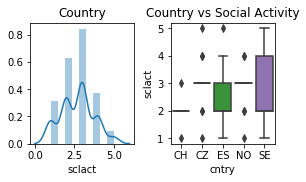

Mean for CH: 2.0
Mean for CZ: 3.0
Mean for ES: 2.5294117647058822
Mean for NO: 2.8461538461538463
Mean for SE: 2.65

KruskalResult(statistic=5.3484638470368626, pvalue=0.25337420468488436)

 Countries with significant differences:
   CH vs CZ: pvalue=0.009972406957522831
   CH vs NO: pvalue=0.024193233977774658

Age: 59.0
Samples: 62
Shapiro-Wilk: Non-Normal, p-value: 6.17739133303985e-05


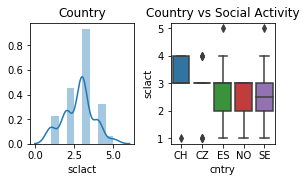

Mean for CH: 3.2222222222222223
Mean for CZ: 2.7857142857142856
Mean for ES: 2.736842105263158
Mean for NO: 2.5
Mean for SE: 2.6666666666666665

KruskalResult(statistic=4.3960050804419017, pvalue=0.35505728671622366)

 Countries with significant differences:
   CH vs NO: pvalue=0.029258109847919263

Age: 60.0
Samples: 68
Shapiro-Wilk: Non-Normal, p-value: 1.922094998008106e-05


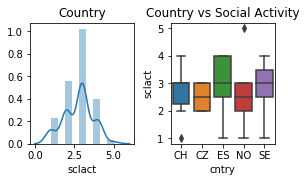

Mean for CH: 2.857142857142857
Mean for CZ: 2.5
Mean for ES: 2.8947368421052633
Mean for NO: 2.5
Mean for SE: 2.909090909090909

KruskalResult(statistic=4.3794992472478436, pvalue=0.35707579893255098)

 Countries with significant differences:

Age: 61.0
Samples: 62
Shapiro-Wilk: Non-Normal, p-value: 6.1319251472014e-06


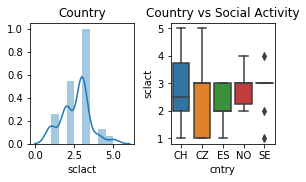

Mean for CH: 2.8
Mean for CZ: 2.4444444444444446
Mean for ES: 2.176470588235294
Mean for NO: 2.8
Mean for SE: 2.875

KruskalResult(statistic=7.8447602664982439, pvalue=0.097433230320164627)

 Countries with significant differences:
   ES vs NO: pvalue=0.023050768419754696
   ES vs SE: pvalue=0.0019786261860832766

Age: 62.0
Samples: 68
Shapiro-Wilk: Non-Normal, p-value: 5.61801300591469e-07


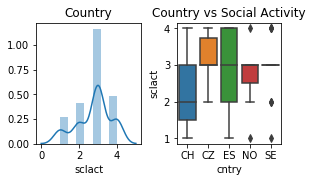

Mean for CH: 2.272727272727273
Mean for CZ: 3.2
Mean for ES: 2.764705882352941
Mean for NO: 2.727272727272727
Mean for SE: 2.9473684210526314

KruskalResult(statistic=5.7309971955289614, pvalue=0.22015841562303579)

 Countries with significant differences:
   CH vs CZ: pvalue=0.016068772846015884
   CH vs SE: pvalue=0.031779185136887586

Age: 63.0
Samples: 67
Shapiro-Wilk: Non-Normal, p-value: 7.109580474207178e-05


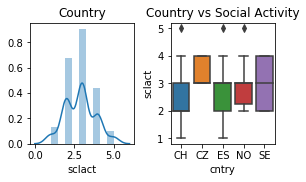

Mean for CH: 2.5384615384615383
Mean for CZ: 3.4
Mean for ES: 2.6666666666666665
Mean for NO: 3.0
Mean for SE: 3.0588235294117645

KruskalResult(statistic=5.7533835246818219, pvalue=0.2183382941488495)

 Countries with significant differences:
   CH vs CZ: pvalue=0.040016260784675795
   CZ vs ES: pvalue=0.04908159872600768

Age: 64.0
Samples: 66
Shapiro-Wilk: Non-Normal, p-value: 1.5089599969542178e-07


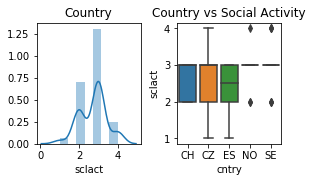

Mean for CH: 2.6363636363636362
Mean for CZ: 2.769230769230769
Mean for ES: 2.4375
Mean for NO: 2.9
Mean for SE: 3.0

KruskalResult(statistic=6.0566474229055736, pvalue=0.19495756206883924)

 Countries with significant differences:
   ES vs NO: pvalue=0.043214526838078846
   ES vs SE: pvalue=0.012372611687249813

Age: 65.0
Samples: 57
Shapiro-Wilk: Non-Normal, p-value: 5.563674494624138e-05


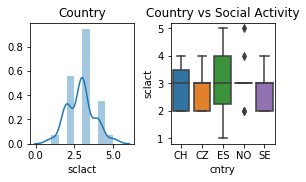

Mean for CH: 2.857142857142857
Mean for CZ: 2.769230769230769
Mean for ES: 3.0
Mean for NO: 3.0833333333333335
Mean for SE: 2.727272727272727

KruskalResult(statistic=1.6495539024997083, pvalue=0.79985950124791461)

 Countries with significant differences:

Age: 67.0
Samples: 64
Shapiro-Wilk: Non-Normal, p-value: 9.302862054028083e-06


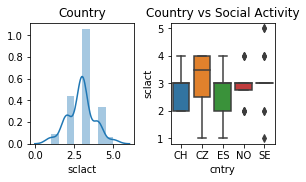

Mean for CH: 2.6666666666666665
Mean for CZ: 3.0
Mean for ES: 2.6923076923076925
Mean for NO: 2.9375
Mean for SE: 3.1363636363636362

KruskalResult(statistic=3.6721646778335009, pvalue=0.45218734849755715)

 Countries with significant differences:

Age: 68.0
Samples: 60
Shapiro-Wilk: Non-Normal, p-value: 0.0004039612540509552


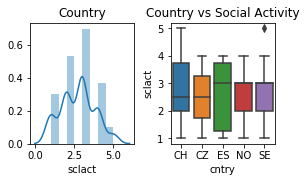

Mean for CH: 2.857142857142857
Mean for CZ: 2.5
Mean for ES: 2.6
Mean for NO: 2.6363636363636362
Mean for SE: 2.823529411764706

KruskalResult(statistic=0.55125756965534978, pvalue=0.9683230062605831)

 Countries with significant differences:

Age: 69.0
Samples: 71
Shapiro-Wilk: Non-Normal, p-value: 1.8475655451766215e-05


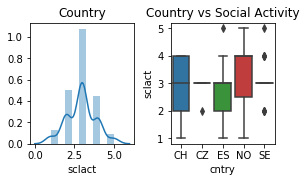

Mean for CH: 2.9166666666666665
Mean for CZ: 2.875
Mean for ES: 2.611111111111111
Mean for NO: 3.272727272727273
Mean for SE: 3.090909090909091

KruskalResult(statistic=5.0424318843927853, pvalue=0.28297136389400041)

 Countries with significant differences:
   ES vs NO: pvalue=0.04889946043345579
   ES vs SE: pvalue=0.03502447686546517

Age: 70.0
Samples: 56
Shapiro-Wilk: Non-Normal, p-value: 0.00018960634770337492


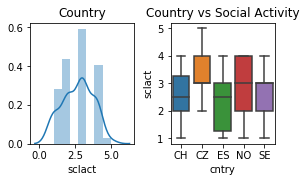

Mean for CH: 2.625
Mean for CZ: 3.2222222222222223
Mean for ES: 2.4285714285714284
Mean for NO: 2.7777777777777777
Mean for SE: 2.625

KruskalResult(statistic=2.6398414063453304, pvalue=0.61978186236564481)

 Countries with significant differences:

Age: 71.0
Samples: 55
Shapiro-Wilk: Non-Normal, p-value: 6.932330870768055e-05


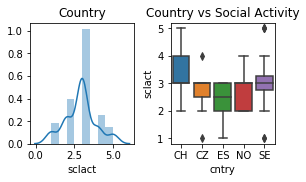

Mean for CH: 3.4
Mean for CZ: 2.7142857142857144
Mean for ES: 2.3
Mean for NO: 2.8333333333333335
Mean for SE: 3.0625

KruskalResult(statistic=6.9999790313852888, pvalue=0.13588933349985435)

 Countries with significant differences:
   CH vs ES: pvalue=0.006579010256385344

Age: 72.0
Samples: 49
Shapiro-Wilk: Non-Normal, p-value: 0.00040481818723492324


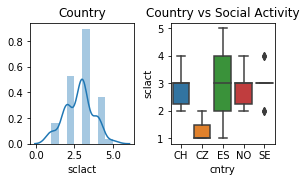

Mean for CH: 2.8
Mean for CZ: 1.3333333333333333
Mean for ES: 2.8666666666666667
Mean for NO: 2.8333333333333335
Mean for SE: 3.0

KruskalResult(statistic=7.2908220363426466, pvalue=0.12129482052330734)

 Countries with significant differences:
   CH vs CZ: pvalue=0.009362356892305392
   CZ vs ES: pvalue=0.025803466363040057
   CZ vs NO: pvalue=0.02203270036841347
   CZ vs SE: pvalue=0.004424633829417452

Age: 73.0
Samples: 46
Shapiro-Wilk: Non-Normal, p-value: 0.00040371829527430236


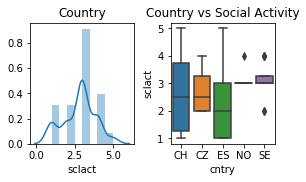

Mean for CH: 2.6666666666666665
Mean for CZ: 2.75
Mean for ES: 2.3846153846153846
Mean for NO: 3.142857142857143
Mean for SE: 3.125

KruskalResult(statistic=3.9166527801239059, pvalue=0.41740316972525771)

 Countries with significant differences:
   ES vs SE: pvalue=0.04527073430308578

Age: 74.0
Samples: 39
Shapiro-Wilk: Non-Normal, p-value: 0.001363699440844357


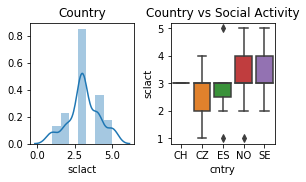

Mean for CH: 3.0
Mean for CZ: 2.6
Mean for ES: 2.857142857142857
Mean for NO: 3.2222222222222223
Mean for SE: 3.4615384615384617

KruskalResult(statistic=3.3176615801528944, pvalue=0.50613881138441719)

 Countries with significant differences:

Age: 75.0
Samples: 48
Shapiro-Wilk: Non-Normal, p-value: 0.00010152957838727161


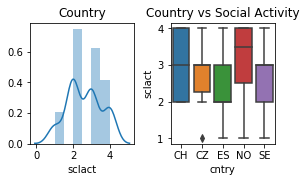

Mean for CH: 3.0
Mean for CZ: 2.6666666666666665
Mean for ES: 2.3529411764705883
Mean for NO: 3.0
Mean for SE: 2.5454545454545454

KruskalResult(statistic=3.7671239696574697, pvalue=0.43843853212027195)

 Countries with significant differences:

Age: 76.0
Samples: 28
Shapiro-Wilk: Non-Normal, p-value: 0.0003639738424681127


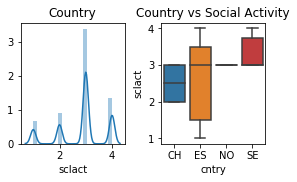

Mean for CH: 2.5
Mean for ES: 2.5454545454545454
Mean for NO: 3.0
Mean for SE: 3.3

KruskalResult(statistic=4.368163905060447, pvalue=0.22435554923202966)

 Countries with significant differences:
   CH vs SE: pvalue=0.018958828577135094

Age: 78.0
Samples: 29
Shapiro-Wilk: Non-Normal, p-value: 6.530438986374065e-05


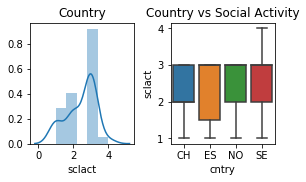

Mean for CH: 2.3333333333333335
Mean for ES: 2.3333333333333335
Mean for NO: 2.4
Mean for SE: 2.6666666666666665

KruskalResult(statistic=0.96478342749528745, pvalue=0.8097724400179418)

 Countries with significant differences:

Age: 79.0
Samples: 17
Shapiro-Wilk: Normal, p-value: 0.21940426528453827


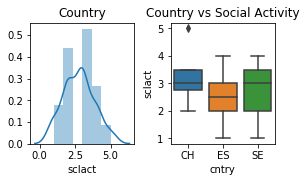

Mean for CH: 3.25
Mean for ES: 2.5
Mean for SE: 2.7142857142857144

F_onewayResult(statistic=0.54652406417112298, pvalue=0.590823214717074)

 Countries with significant differences:

Age: 80.0
Samples: 30
Shapiro-Wilk: Non-Normal, p-value: 0.002867043251171708


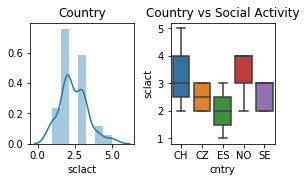

Mean for CH: 3.3333333333333335
Mean for CZ: 2.5
Mean for ES: 2.0
Mean for NO: 3.3333333333333335
Mean for SE: 2.6

KruskalResult(statistic=7.1978171091445207, pvalue=0.12579652604829303)

 Countries with significant differences:
   ES vs NO: pvalue=0.034440417398070196

Age: 81.0
Samples: 18
Shapiro-Wilk: Non-Normal, p-value: 0.014222455210983753


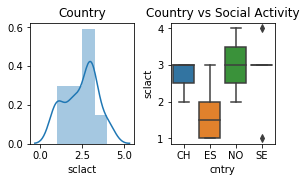

Mean for CH: 2.6666666666666665
Mean for ES: 1.6666666666666667
Mean for NO: 3.0
Mean for SE: 2.8333333333333335

KruskalResult(statistic=5.8437499999999991, pvalue=0.11946458654899914)

 Countries with significant differences:
   ES vs SE: pvalue=0.031062276941678884

Age: 82.0
Samples: 26
Shapiro-Wilk: Non-Normal, p-value: 0.020518645644187927


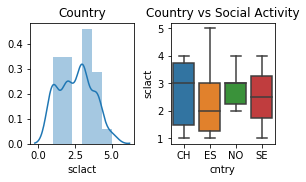

Mean for CH: 2.6666666666666665
Mean for ES: 2.4
Mean for NO: 2.8333333333333335
Mean for SE: 2.5

KruskalResult(statistic=0.77615715497395632, pvalue=0.8551610105148123)

 Countries with significant differences:

Age: 83.0
Samples: 15
Shapiro-Wilk: Normal, p-value: 0.08152253925800323


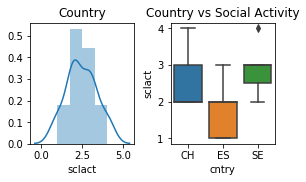

Mean for CH: 2.6666666666666665
Mean for ES: 1.8
Mean for SE: 2.857142857142857

F_onewayResult(statistic=2.4576659038901592, pvalue=0.12746893251456859)

 Countries with significant differences:
   ES vs SE: pvalue=0.029254370851466198

Age: 84.0
Samples: 17
Shapiro-Wilk: Non-Normal, p-value: 0.005953662563115358


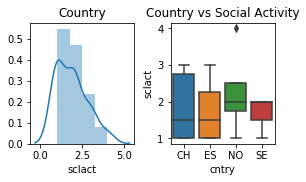

Mean for CH: 1.8333333333333333
Mean for ES: 1.75
Mean for NO: 2.25
Mean for SE: 1.6666666666666667

KruskalResult(statistic=0.54461396208968282, pvalue=0.90898610895400211)

 Countries with significant differences:

Age: 85.0
Samples: 13
Shapiro-Wilk: Non-Normal, p-value: 0.039369840174913406


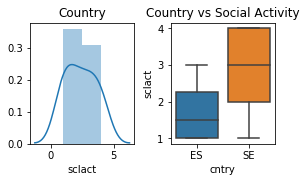

Mean for ES: 1.75
Mean for SE: 2.6666666666666665

MannwhitneyuResult(statistic=10.0, pvalue=0.11625515343594578)

Age: 86.0
Not Enough Samples to continue: 0

Age: 87.0
Samples: 6
Group size too small to continue: 1

Age: 89.0
Samples: 9
Shapiro-Wilk: Normal, p-value: 0.24645256996154785


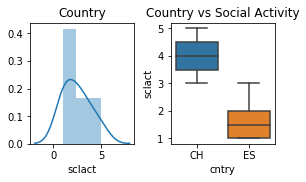

Mean for CH: 4.0
Mean for ES: 1.6666666666666667

Ttest_indResult(statistic=3.7804320740712511, pvalue=0.0068883885971110963)

Age: 90.0
Samples: 3
Group size too small to continue: 1

Age: 91.0
Not Enough Samples to continue: 0

Age: 92.0
Not Enough Samples to continue: 0

Age: 93.0
Not Enough Samples to continue: 0

Age: 94.0
Not Enough Samples to continue: 0

Age: 95.0
Not Enough Samples to continue: 0

Age: 96.0
Not Enough Samples to continue: 0

Age: 97.0
Not Enough Samples to continue: 0

Age: 101.0
Not Enough Samples to continue: 0

Age: 103.0
Not Enough Samples to continue: 0

Age: 114.0
Not Enough Samples to continue: 0


In [15]:
for a in sorted(df.agea.unique()):
    print ('\nAge: {}'.format(a))
    dataSet = df[(df['year'] == 7) & (df['agea'] == a)]
    x = {'column':'cntry', 'label':'Country'}
    y = {'column':'sclact', 'label':'Social Activity'}
    xVals = [{'label':'CH','value':'CH'},
             {'label':'CZ','value':'CZ'},
             {'label':'DE','value':'DE'},
             {'label':'ES','value':'ES'},
             {'label':'NO','value':'NO'},
             {'label':'SE','value':'SE'}
            ]

    plotAndCompare(dataSet,x,y,xVals,independent=True)